# Домашняя работа №2

In [25]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

_Выборка - это подмножество генеральной совокупности_

- Если размер выборки больше 200, то такая выборка является репрезентативной?

_Репрезентативная выборка не только должна быть достаточно большой, но и охватывать максимально возможно подмножества генеральной совокупности. Например: Производится опрос учащихся школ Москвы, и опросили 1500 учеников(мальчиков) школ центрального округа, такая выборка скорее всего не будет "репрезентативной", а вот если сделать опрос по 150(девочек и мальчиков, примерно одинаково) в школах всех 10-ти округов города, то тогда выборку можно бут считать "репрезентативной"._

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

_Может быть длинна волос всех футболистов, всех команд, учасвовавших в ЧМ-2018, или длинна волос всех футболистов всех команд всех чемпионатов мира за всю историю_

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

_Можно взять в архивах карты детей по 50 мальчиков и 50 девочек за каждый год заданного периода во всех роддомах Волгограда_

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.

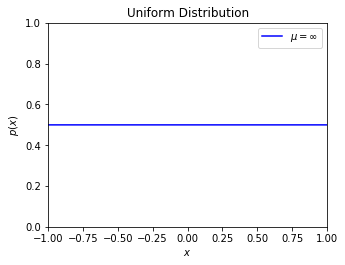

In [205]:
fig, ax = plt.subplots(figsize=(5, 3.75))

ufdist = stats.uniform(loc=-1, scale=2)
x = np.arange(-1, 10)

plt.plot(x, ufdist.pdf(x), color='b', linestyle='-', label=r'$\mu=\infty$')

plt.xlim(-1, 1)
plt.ylim(0, 1)

plt.xlabel('$x$')
plt.ylabel(r'$p(x)$')
plt.title('Uniform Distribution')

plt.legend()
plt.show()

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [168]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
mean = sample.mean()

Text(0.5,1,'Исходный набор данных')

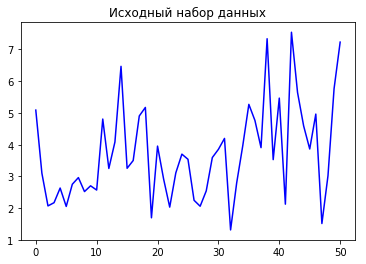

In [170]:
x = np.arange(0, 51)
plt.plot(x, sample, color='b', linestyle='-', label=r'$\mu=\infty$')
plt.title('Исходный набор данных')

Text(0.5,1,'Набор данных с выбросом')

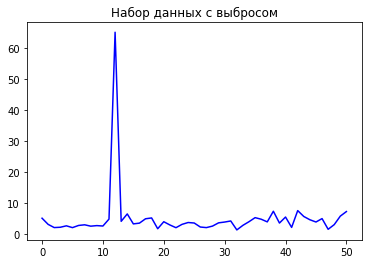

In [171]:
sample1 = np.array(sample)
sample1[12] *= 20
x = np.arange(0, 51)
plt.plot(x, sample1, color='b', linestyle='-', label=r'$\mu=\infty$')
plt.title('Набор данных с выбросом')

In [58]:
#your code here
med1 = sorted(sample1)[24]
mean1 = sample1.mean()
print('med, med1=', med, med1)
print('mean, mean1=', mean, mean1)

med, med1= 4.00682885515695 4.028036056095446
mean, mean1= 4.237589744500007 5.061246952997877


 -- медиана менее чувствительна к выбросам 

- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [174]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = sample.mean()
print('mean: ', mean)
sample_with_c = sample + C
mean_with_c = sample_with_c.mean()
print('mean_with_c: ', mean_with_c)
sample_mult_c = sample * C
mean_mult_c = sample_mult_c.mean()
print('mean_mult_c: ', mean_mult_c)


mean:  2.09
mean_with_c:  2.59
mean_mult_c:  1.045


- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

Text(0.5,1,'Исходный набор данных')

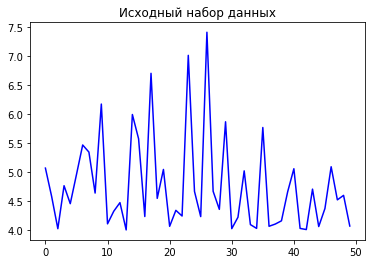

In [175]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()
x = np.arange(0, 50)
plt.plot(x, sample, color='b', linestyle='-', label=r'$\mu=\infty$')
plt.title('Исходный набор данных')

Text(0.5,1,'Набор данных с выбросом')

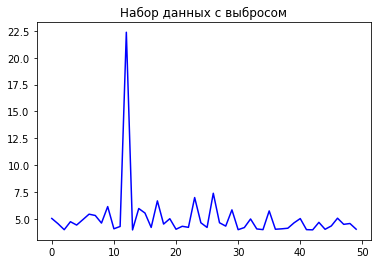

In [176]:
#your code here
sample_with_overshoot = np.array(sample)
sample_with_overshoot[12] *= 5
x = np.arange(0, 50)
plt.plot(x, sample_with_overshoot, color='b', linestyle='-', label=r'$\mu=\infty$')
plt.title('Набор данных с выбросом')

In [82]:
new_var = sample_with_overshoot.var()
print('var, new_var: ', var, new_var)

var, new_var:  0.8591001327877162 7.619682629789232


- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s^2, \bar{X}+s^2)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [125]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)
#your code here
m1 = np.percentile(sample, 0.75) - np.percentile(sample, 0.25)
m2 =(sample.mean() + sample.var()) - (sample.mean() - sample.var())
from IPython.display import Markdown as md
md('($X_{0.75} - X_{0.25}$): %.5f, ($\\bar{X}-s^2, \\bar{X}+s^2$):  %.5f' % (m1, m2))


($X_{0.75} - X_{0.25}$): 0.27292, ($\bar{X}-s^2, \bar{X}+s^2$):  2.04848

## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [131]:
# Статистика - это некоторая характеристика выборки
beta_rv = stats.beta(1,3)
sample = beta_rv.rvs(1000)
print('среднее: ', sample.mean())
print('дисперсия: ', sample.var())
print('медиана: ', np.percentile(sample, 0.5))

среднее:  0.24438563050971432
дисперсия:  0.03552019688746494
медиана:  0.0018293395979415619


- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [133]:
gamma_rv = stats.gamma(2,2)
sample = gamma_rv.rvs(1000)
#your code here
mean = sample.mean()
var = sample.var()
med = np.percentile(sample, 0.5)
print('среднее: ', mean)
print('дисперсия: ', var)
print('медиана: ', med)

среднее:  3.948844956925958
дисперсия:  1.8216937139940936
медиана:  2.1255856026222526


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

Дисперсия распределеения средних:  0.2848684002957635


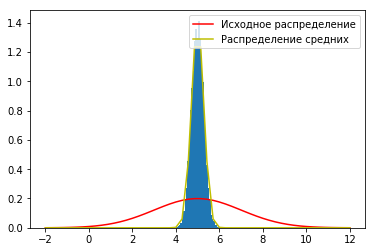

In [221]:
#your code here
norm_rv = stats.norm(5,2)
means = np.zeros(10000)
for i in range(means.shape[0]):
    sample = norm_rv.rvs(50)
    means[i] = sample.mean()
    #your code here
plt.hist(means, bins=40, density=True)    

sample = norm_rv.rvs(50)
v = means.var()**.5
print('Дисперсия распределеения средних: ', v)
x = np.linspace(-2,12,50)
norm1_rv = stats.norm(5, v)
plt.plot(x, norm_rv.pdf(x), color='r', linestyle='-', label=r'Исходное распределение')
plt.plot(x, norm1_rv.pdf(x), color='y', linestyle='-', label=r'Распределение средних')
plt.legend()


- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

Дисперсия распределеения средних:  0.8908396136361489


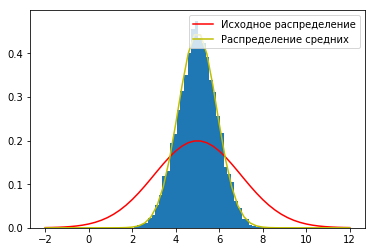

In [222]:
# Нужно взять баленкие выборки
#your code here
norm_rv = stats.norm(5,2)
means = np.zeros(10000)
for i in range(means.shape[0]):
    sample = norm_rv.rvs(5)
    means[i] = sample.mean()
    #your code here
plt.hist(means, bins=40, density=True)    

sample = norm_rv.rvs(50)
v = means.var()**.5
print('Дисперсия распределеения средних: ', v)
x = np.linspace(-2,12,50)
norm1_rv = stats.norm(5, v)
plt.plot(x, norm_rv.pdf(x), color='r', linestyle='-', label=r'Исходное распределение')
plt.plot(x, norm1_rv.pdf(x), color='y', linestyle='-', label=r'Распределение средних')
plt.legend()


- Сделайте z-преобразование для данного распределения

In [199]:
expon_rv = stats.expon(3)
sample = expon_rv.rvs(1000)
mean = sample.mean()
var = sample.var()
new_rv = [(x-mean)/var for x in sample]
#plt.hist(new_rv, bins=20, density=True)    
print('mean:%.2f' % np.mean(new_rv), 'var: %.2f' % np.var(new_rv))

mean:-0.00 var: 1.08


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [202]:
#your code here
chi2_rv = stats.chi2(10)
chi2_rv.ppf(.9)

15.987179172105263

- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [204]:
#your code here
chi2_rv = stats.chi2(15)
chi2_rv.ppf(.9), chi2_rv.ppf(.95)

(22.307129581578703, 24.995790139728616)

- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [210]:
norm_rv = stats.norm(0, 2)
#your code here
rv1 = norm_rv.rvs(100)
v1 = (rv1.mean() + rv1.var()*2) - (rv1.mean() - rv1.var()*2)
rv2 = norm_rv.rvs(200)
v2 = (rv2.mean() + rv2.var()*2) - (rv2.mean() - rv2.var()*2)
v1, v2
# больше выборка - интервал меньше, т.к. уменишится дисперсия

(16.522033855521975, 17.669165713746665)

- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [215]:
# Ошибка второго рода

#### Какие рассуждения относительно p-value верные?

- Если p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем сильнее получаемые различия.


In [214]:
# Ответ:
# - Если p=0.003, значит что событие описанное в нулевой гипотезе произойдет с вероятностью 0.003
# - Если p=0,9, значит что стоит оставить нулевую гипотезу для дальнейшего исследования
# - Чем больше p, тем меньше основания для того чтобы отвергнуть гипотезу

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99\% доверительный интервал хорошей оценкой в общем случае?

In [212]:
#Если отклонять рисковано, то лучше ипользовать 0.01. Но в общем случае это является очень слабой оценкой. 

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

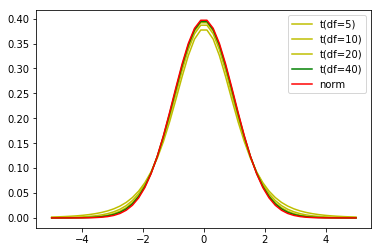

In [225]:
#your code here
st5_rv = stats.t(5)
st10_rv = stats.t(10)
st20_rv = stats.t(20)
st40_rv = stats.t(40)
norm_rv = stats.norm(0,1)

x = np.linspace(-5,5,50)
plt.plot(x, st5_rv.pdf(x), color='y', linestyle='-', label=r't(df=5)')
plt.plot(x, st10_rv.pdf(x), color='y', linestyle='-', label=r't(df=10)')
plt.plot(x, st20_rv.pdf(x), color='y', linestyle='-', label=r't(df=20)')
plt.plot(x, st40_rv.pdf(x), color='g', linestyle='-', label=r't(df=40)')
plt.plot(x, norm_rv.pdf(x), color='r', linestyle='-', label=r'norm')
plt.legend()
#Чем больше степеней свободы, тем больше больше приближение к нормальному

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

In [248]:
#your code here
a = [ (np.random.randint(1,100), np.random.randint(1,100))  for i in 
range(0,1000) ]
df = pd.DataFrame(data =a,columns=['fld1','fld2'])
df['fld2'] = -df['fld1']
corr = df.corr()

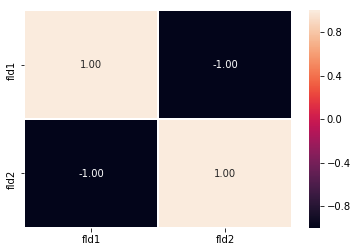

In [249]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, fmt=".2f", 
            linewidths=0.5)

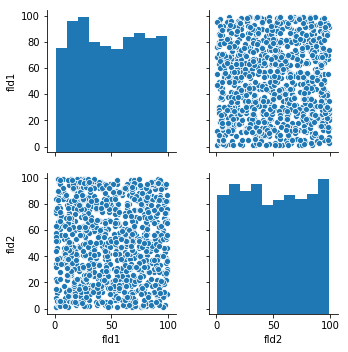

In [256]:
sns_plot = sns.pairplot(df[['fld1', 'fld2']]);


- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

In [259]:
#your code here
a = [ (np.random.randint(1,100), np.random.randint(1,100))  for i in 
range(0,1000) ]
df = pd.DataFrame(data =a,columns=['fld1','fld2'])
corr = df.corr()

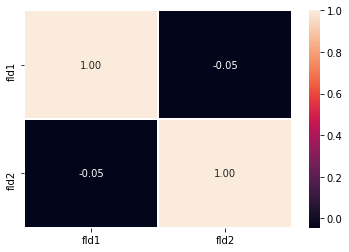

In [260]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, fmt=".2f", 
            linewidths=0.5)

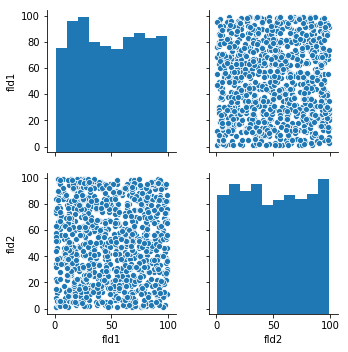

In [258]:
sns_plot = sns.pairplot(df[['fld1', 'fld2']]);


- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [280]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))
ssorted = list(np.sort(sample))
#your code here
r = np.array(sample)
for i in range(len(sample)):
    r[i] = ssorted.index(sample[i])
rank = 0
for i in range(len(r)):
    rank += r[i]
rank1 = 0
for i in range(len(sample_1)):
    rank1 += r[i]
rank2 = 0
for i in range(len(sample_1), len(sample)):
    rank2 += r[i]
rank, rank1, rank2

(19900.0, 10211.0, 9689.0)